In [1]:
# Bethe-Bloch, para muon en Silicio
# Forma de cociente I²(1-β²)

#import ROOT
import math 
import os,sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib as mpl

In [2]:
# --- Constantes ---
m_e = 9.109 * pow(10,-31)        # masa del e⁻ [Kg]
c   = 3 * pow(10,8)              # vel. luz  [m/s]
z   = 1                          # carga partícula entrante
e   = 1.602 * pow(10,-19)        # carga del e⁻ [Coulomb]
NA  = 6.022 * pow(10,23)         # num. avogadro [1/mol]
Z   = 14				         # num. atómico del Si
rho = 2330                       # densidad Si [kg/m³]
A   = 28 * pow(10,-3)            # masa atómica Si [kg/mol]
n_e = Z * rho * NA/ A            # densidad e⁻, para meterial
epsilon_0 = 8.854 * pow(10,-12.) # permitividad vacío [F/m]
I = 2.77 * pow(10,-17)           # potencial de excitación medio [Joules]
re = 2.8 * pow(10,-15)           # radio atm. e⁻ [m]

 
# --- Constantes términos de corrección Bethe-Bloch ---
# --- Desndidad parametrización Sternheimer’s ---
hbar = 6.626 * pow(10,-34)/2/math.pi
alpha = e**2 / (4 * math.pi * epsilon_0 * hbar * c)

hnup = 4.9764 * pow(10,-18) # Joules, h * nu_p
S0   = 0.201
S1   = 2.872
a    = 0.149
md   = 3.255
delta0 = 0.14
M = 200 * m_e
C = -2 * math.log(I/hnup) - 1

# --- Funciones lambda ---
sqr = lambda x: x*x   # potencia x²

# --- Funciones def ---
def gamma(beta):      # Ɣ = 1/√(1-β²)
    return 1./math.sqrt(1-sqr(beta))

def Bg(beta):         # β⋅Ɣ = β/√(1-β²)
    return beta*gamma(beta)

def Tmax(beta):
    return 2*m_e*sqr(c) * sqr(Bg(beta)) / (1 + ( 2*gamma(beta)*m_e )/( M + sqr(m_e/M) )) 

def dedx(beta, flag_density=True, flag_beta = True):
    temp_izq = (2*math.pi * n_e * sqr(z) * (e**4)) / (m_e * sqr(c) * sqr(beta) * sqr(4 * math.pi * epsilon_0))
    
    # arg. Logₑ()
    num = 2 * m_e * sqr(beta) * sqr(c) * Tmax(beta)
    den = I**2 * (1-sqr(beta))
    dedx = temp_izq * (math.log(num/den))
    
    if flag_density:
        dedx += temp_izq * (- density_stern(beta))
    if flag_beta:
        dedx += temp_izq * (-2*beta**2)
        
    dedx = dedx * .01 # convert to cm 
    dedx = dedx * 6.24 * pow(10,12) # convert to MeV
    return dedx 

# --- Funciones términos de corrección --- 
def density(beta):
    n = NA*rho*Z/A
    pe = math.sqrt(4*math.pi*n*pow(re,3)) * m_e * c**2 / alpha
    return 2*(math.log(pe/I) + math.log(Bg(beta))-0.5)

def density_stern(beta): # término de parametrización de densidad de Sternheimer 
    '''Taken from Leroy, Radiative Interactions in Matter'''
    if Bg(beta) < pow(10,S0):
        delta = delta0 * pow(Bg(beta)/pow(10,S0),2)
    elif Bg(beta) < pow(10,S1):
        delta = 2 * math.log(Bg(beta)) + C + a * pow(1/math.log(10) * math.log(pow(10,S1)/Bg(beta)),md)
    else:
        delta = 2 * math.log(Bg(beta)) + C
    return delta
    

In [3]:
βs    = np.linspace(0.2,.99999999,100) # betas
Xpts  = [Bg(betas) for betas in βs]    # puntos β⋅Ɣ 
Ypts_classical = [dedx(betas,False,False) for betas in βs ] # puntos y clásicos
Ypts_density   = [dedx(betas) for betas in βs]              # puntos y usando término densidad
Ypts_nodensity = [dedx(betas,True,False) for betas in βs]   # puntos y sin usar densidad

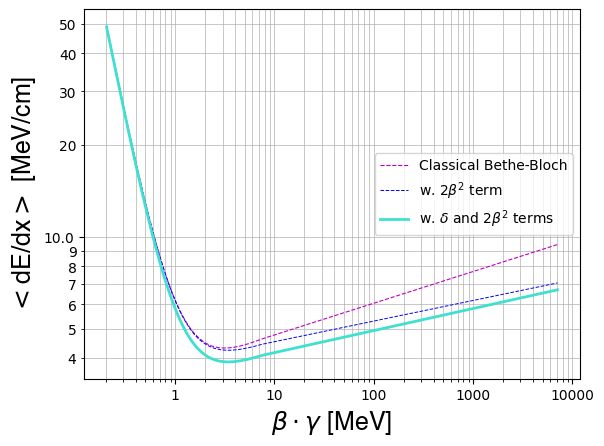

In [6]:
plt.plot(Xpts,Ypts_classical,'m--',linewidth=0.8, label = "Classical Bethe-Bloch")
plt.plot(Xpts,Ypts_nodensity,'b--',linewidth=0.7, label = "w. 2$\\beta^2$ term")
plt.plot(Xpts,Ypts_density,'turquoise',linewidth=2, label = "w. $\\delta$ and 2$\\beta^2$ terms")
ax = plt.gca()
plt.xscale("log")
plt.yscale("log")
plt.grid(True,which="both",linewidth=0.5)
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_minor_formatter(ScalarFormatter())
ax.set_xlabel('$\\beta \cdot \\gamma$ [MeV]',{'fontname':'Helvetica'})
ax.set_ylabel('$<$dE/dx$>$ [MeV/cm]',{'fontname':'Helvetica'})
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.legend(loc="center right")
plt.show()
